# **Welcome to my CNN Deep Learning Project!**

---

This project is a **Brain Tumor** Detection Classifier,
made by **Aryaman Rao**, India

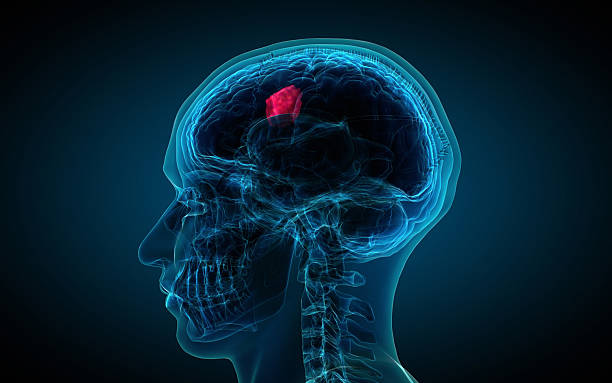

## 1) Importing Python Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf
import os
import cv2
import random
from shutil import copyfile
from os import getcwd

## 2) Unziping the Dataset

In [ ]:
!unzip brainmri

Archive:  brainmri.zip
   creating: Brain MRI/
   creating: Brain MRI/brain_tumor_dataset/
   creating: Brain MRI/brain_tumor_dataset/no/
  inflating: Brain MRI/brain_tumor_dataset/no/30 no.jpg  
  inflating: Brain MRI/brain_tumor_dataset/no/22 no.jpg  
  inflating: Brain MRI/brain_tumor_dataset/no/41 no.jpg  
  inflating: Brain MRI/brain_tumor_dataset/no/14 no.jpg  
  inflating: Brain MRI/brain_tumor_dataset/no/no 10.jpg  
  inflating: Brain MRI/brain_tumor_dataset/no/18 no.jpg  
  inflating: Brain MRI/brain_tumor_dataset/no/no 9.png  
  inflating: Brain MRI/brain_tumor_dataset/no/no 7.jpeg  
  inflating: Brain MRI/brain_tumor_dataset/no/no 8.jpg  
  inflating: Brain MRI/brain_tumor_dataset/no/no.jpg  
  inflating: Brain MRI/brain_tumor_dataset/no/3 no.jpg  
  inflating: Brain MRI/brain_tumor_dataset/no/43 no.jpg  
  inflating: Brain MRI/brain_tumor_dataset/no/20 no.jpg  
  inflating: Brain MRI/brain_tumor_dataset/no/32 no.jpg  
  inflating: Brain MRI/brain_tumor_dataset/no/2 no.jpeg 

In [ ]:
try:
    os.mkdir('/content/Brain MRI/training')
    os.mkdir('/content/Brain MRI/testing')
    os.mkdir('/content/Brain MRI/training/yes')
    os.mkdir('/content/Brain MRI/training/no')
    os.mkdir('/content/Brain MRI/testing/yes')
    os.mkdir('/content/Brain MRI/testing/no')
except OSError:
    pass
   

## 3) Splitting the Dataset into Training and Validation

In [ ]:
def split_data(Source, Training, Testing, Size):
  for x in os.listdir(Source):

    file=os.path.join(Source,x)
    if os.path.getsize(file):
      pass
    else:
      print("{} file is empty!",format(file))


  n=len(os.listdir(Source))

  split = int(n*Size)

  shuffle=random.sample(os.listdir(Source),n)

  train_dir=shuffle[:split]
  test_dir=shuffle[split:]

  for file in train_dir:
        initial=os.path.join(Source,file)
        final=os.path.join(Training,file)
        copyfile(initial,final)
        
  for file in test_dir:
        initial=os.path.join(Source,file)
        final=os.path.join(Testing,file)
        copyfile(initial,final)



In [ ]:
source='/content/Brain MRI/yes'
train='/content/Brain MRI/training/yes'
test='/content/Brain MRI/testing/yes'
size=0.8
split_data(source,train,test,size)

source='/content/Brain MRI/no'
train='/content/Brain MRI/training/no'
test='/content/Brain MRI/testing/no'
size=0.8
split_data(source,train,test,size)

In [ ]:
print(len(os.listdir('/content/Brain MRI/training/yes')))
print(len(os.listdir('/content/Brain MRI/training/no')))
print(len(os.listdir('/content/Brain MRI/testing/yes')))
print(len(os.listdir('/content/Brain MRI/testing/no')))

124
78
31
20


## 4) Data Visualization

In [ ]:
nrows,ncols=4,4
index=0

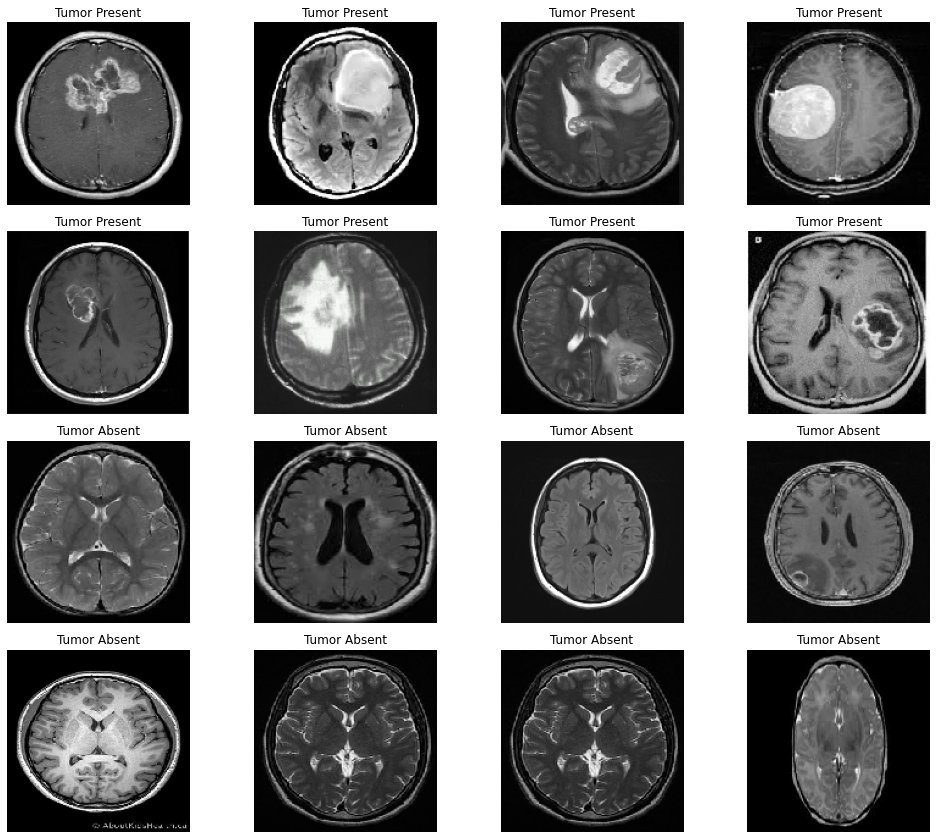

In [ ]:
from tensorflow.keras.preprocessing import image

index+=8

fig=plt.figure(figsize=(14,12))
main='/content/Brain MRI/training/yes'
files=os.listdir(main)
path_1=[os.path.join(main,file) for file in files[index-8:index]]

main='/content/Brain MRI/training/no'
files=os.listdir(main)
path_2=[os.path.join(main,file) for file in files[index-8:index]]

for i,img_path in enumerate(path_1+path_2):
  ax=plt.subplot(nrows,ncols,i+1)
  # fig.subplots_adjust(hspace=0.5, wspace=0.5)
  plt.tight_layout()
  ax.axis('off')
  pic=image.load_img(img_path,target_size=(150,150))
  plt.imshow(pic)
  if i<8:
    plt.title('Tumor Present')
  else:
    plt.title('Tumor Absent')

### 5) Creating a Deep Neural Network

In [ ]:
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [ ]:
model = None
model = Sequential()
# Adding Convolution Layers
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
# Adding Neural Layers
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer=Adam(learning_rate=0.00005), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_150 (Conv2D)          (None, 252, 252, 64)      4864      
_________________________________________________________________
max_pooling2d_103 (MaxPoolin (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_151 (Conv2D)          (None, 122, 122, 64)      102464    
_________________________________________________________________
max_pooling2d_104 (MaxPoolin (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_152 (Conv2D)          (None, 59, 59, 128)       73856     
_________________________________________________________________
conv2d_153 (Conv2D)          (None, 57, 57, 128)       147584    
_________________________________________________________________
conv2d_154 (Conv2D)          (None, 55, 55, 128)     

## 6) Data Preprocessing and Augmentation

In [ ]:
TRAINING_DIR = "/content/Brain MRI/training/"
train_datagen = ImageDataGenerator(rescale=1.0/255.)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(256, 256))

VALIDATION_DIR = "/content/Brain MRI/testing/"
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=20,
                                                              class_mode='binary',
                                                              target_size=(256, 256))

## 7) Training the Model

In [ ]:
history = model.fit(train_generator, epochs=40,
                    validation_data=validation_generator)

Epoch 1/40
11/11 [==============================] - 4s 265ms/step - loss: 0.6902 - accuracy: 0.5644 - val_loss: 0.6831 - val_accuracy: 0.6078
Epoch 2/40
11/11 [==============================] - 3s 231ms/step - loss: 0.6752 - accuracy: 0.6139 - val_loss: 0.6672 - val_accuracy: 0.6078
Epoch 3/40
11/11 [==============================] - 3s 245ms/step - loss: 0.6564 - accuracy: 0.6139 - val_loss: 0.6633 - val_accuracy: 0.6078
Epoch 4/40
11/11 [==============================] - 3s 233ms/step - loss: 0.6513 - accuracy: 0.6139 - val_loss: 0.6551 - val_accuracy: 0.6078
Epoch 5/40
11/11 [==============================] - 3s 231ms/step - loss: 0.6523 - accuracy: 0.6139 - val_loss: 0.6561 - val_accuracy: 0.6078
Epoch 6/40
11/11 [==============================] - 3s 231ms/step - loss: 0.6544 - accuracy: 0.6139 - val_loss: 0.6470 - val_accuracy: 0.6078
Epoch 7/40
11/11 [==============================] - 3s 229ms/step - loss: 0.6335 - accuracy: 0.6139 - val_loss: 0.6410 - val_accuracy: 0.6078
Epoch 

## 7) Graphical Representation

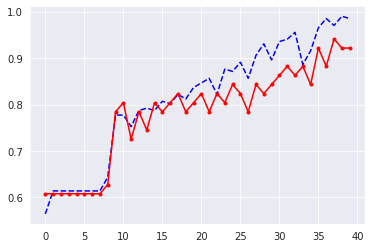

In [ ]:
import seaborn as sns
sns.set_style('darkgrid')
acc=history.history['accuracy']
val_loss=history.history['val_loss']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
epochs=history.epoch

plt.plot(epochs,acc,'--',color='blue')
plt.plot(epochs, val_acc, '.-', color='red')

Text(0.5, 1.0, 'Training Loss vs Validation Loss')

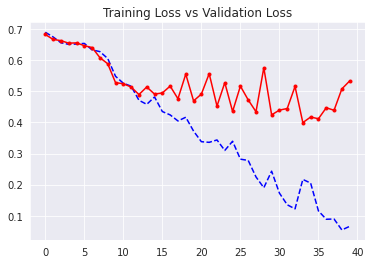

In [ ]:
plt.plot(epochs,loss,'--',color='blue')
plt.plot(epochs, val_loss, '.-', color='red')
plt.title('Training Loss vs Validation Loss')

## 8) Evaluating the Model

In [ ]:
test_loss, test_acc= model.evaluate(validation_generator)
print(test_acc)

3/3 [==============================] - 0s 102ms/step - loss: 0.5335 - accuracy: 0.9216
0.9215686321258545


## **Validation Accuracy:- 92.157%**


---

Best Validation Accuracy:- 94.120%

In [ ]:
print(test_loss)

0.5335487723350525


## **RESULTS :**


> 1. Training Accuracy:   **98.51%**

> 2. Validation Accuracy: **92.16%**

> 3. Training Loss:       **0.0659**

> 4. Validation Loss: **0.5335**









## 9) Sample Testing on the Model

Saving detecting-brain-tumors-using-patient-urine-or-blood-plasma-351286.jpg to detecting-brain-tumors-using-patient-urine-or-blood-plasma-351286 (1).jpg
[7.1899353e-06]

 Brain Tumor Detected! 



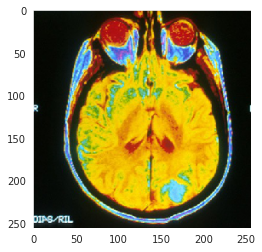

In [ ]:
from google.colab import files
from keras.preprocessing import image
sns.set_style('dark')
uploaded = files.upload()

for y in uploaded.keys():
 
  # predicting images
  path = '/content/' + y
  img = image.load_img(path, target_size=(256, 256))
  x = image.img_to_array(img)
  x = x / 255
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  print()
  if classes[0]<0.5:
    print(" Brain Tumor Detected! ")
  else:
    print(" No Brain Tumor Found! ")
print()
plt.imshow(img)

**CORRECT PREDICTON!**

In [1]:
#. Made by ARYAMAN RAO, STUDENT, UNGERGRAD FROM DELHI TECHNOLOGICAL UNIVERSITY, INDIA